In [137]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns


In [138]:
df = pd.read_csv('C:/Users/frado/AI_STUDY_DATA/titanic.csv', index_col=0)

In [139]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [140]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [141]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

In [142]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [143]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [144]:
df['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F2             3
D              3
              ..
E40            1
C32            1
C45            1
B4             1
A7             1
Name: Cabin, Length: 147, dtype: int64

In [145]:
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q':2})
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,0.0
888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,0.0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,0.0


In [146]:
df_without_Name = df.drop(['Name','Ticket','Cabin'], axis=1)
print(df_without_Name.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [149]:
df_without_Name.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 62.6 KB


In [150]:
df_without_Name.dropna(subset=['Age'], inplace=True)


In [151]:
df_without_Name['Embarked'].fillna(0, inplace=True)

In [152]:
df_without_Name.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [153]:
X = df_without_Name.drop('Survived', axis=1)
y = df_without_Name['Survived']

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((535, 7), (179, 7), (535,), (179,))

In [155]:
# NaN 값이 있는 열 확인
print("Columns with NaN values in X_train:")
print(X_train.columns[X_train.isna().any()])

# NaN 값이 있는 행 확인
print("\nRows with NaN values in X_train:")
print(X_train[X_train.isna().any(axis=1)])


Columns with NaN values in X_train:
Index([], dtype='object')

Rows with NaN values in X_train:
Empty DataFrame
Columns: [Pclass, Sex, Age, SibSp, Parch, Fare, Embarked]
Index: []


In [156]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
0


In [171]:
# 상관 계수 계산
correlation_matrix = df_without_Name.corr()

# 상관 계수 출력
print(correlation_matrix)

          Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.359653 -0.538826 -0.077221 -0.017358  0.093317   
Pclass   -0.359653  1.000000  0.155460 -0.369226  0.067247  0.025683   
Sex      -0.538826  0.155460  1.000000  0.093254 -0.103950 -0.246972   
Age      -0.077221 -0.369226  0.093254  1.000000 -0.308247 -0.189119   
SibSp    -0.017358  0.067247 -0.103950 -0.308247  1.000000  0.383820   
Parch     0.093317  0.025683 -0.246972 -0.189119  0.383820  1.000000   
Fare      0.268189 -0.554182 -0.184994  0.096067  0.138329  0.205119   
Embarked  0.106556 -0.106056 -0.095006  0.010171  0.004793 -0.013361   

              Fare  Embarked  
Survived  0.268189  0.106556  
Pclass   -0.554182 -0.106056  
Sex      -0.184994 -0.095006  
Age       0.096067  0.010171  
SibSp     0.138329  0.004793  
Parch     0.205119 -0.013361  
Fare      1.000000  0.175410  
Embarked  0.175410  1.000000  


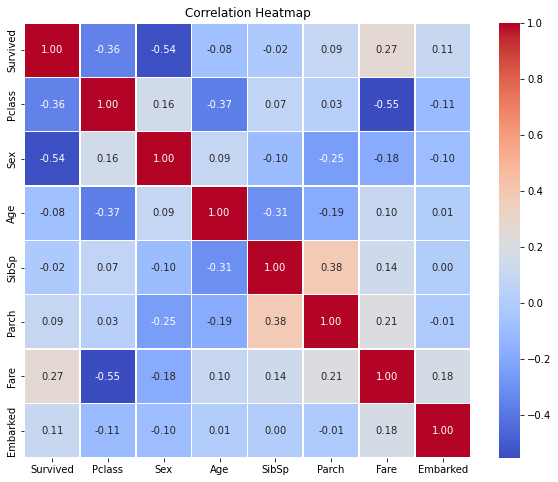

In [172]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [158]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Text(0.5, 1.0, 'Survived Count')

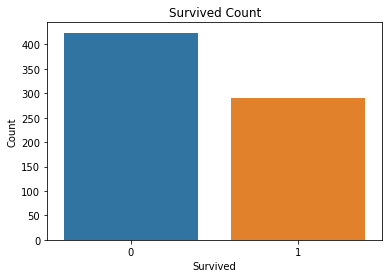

In [164]:
sns.countplot(x='Survived', data=df_without_Name)
plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Survived Count")


<AxesSubplot:xlabel='Survived', ylabel='Count'>

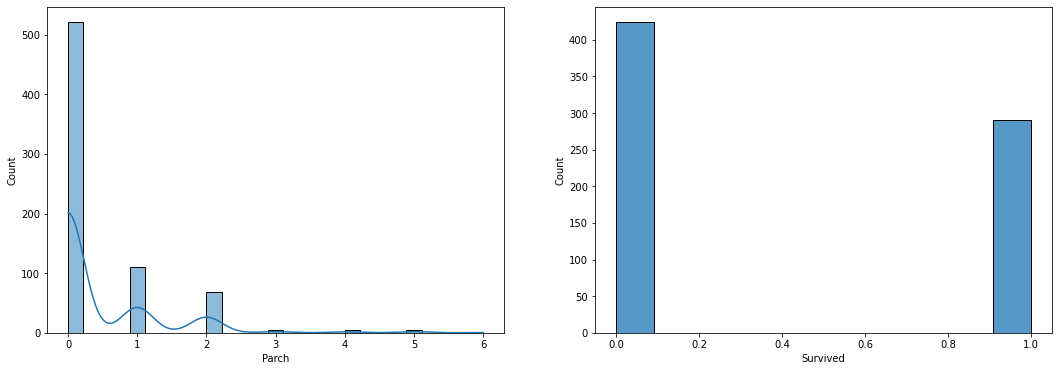

In [170]:
figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.histplot(df_without_Name['Parch'], kde = True, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.histplot(df_without_Name['Survived'], ax=ax2)


3    355
1    186
2    173
Name: Pclass, dtype: int64


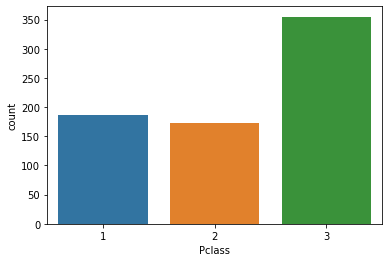

In [173]:
print(df_without_Name['Pclass'].value_counts())
sns.countplot(x='Pclass', data=df_without_Name)
plt.show()


0    424
1    290
Name: Survived, dtype: int64


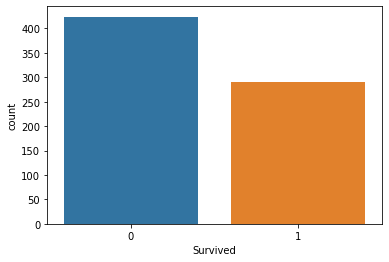

In [174]:
print(df_without_Name['Survived'].value_counts())
sns.countplot(x='Survived', data=df_without_Name)
plt.show()


In [175]:
print(df[['Sex', 'Pclass', 'Survived']].corr())

               Sex    Pclass  Survived
Sex       1.000000  0.131900 -0.543351
Pclass    0.131900  1.000000 -0.338481
Survived -0.543351 -0.338481  1.000000


In [177]:
# SVM

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.6536312849162011
[[90 13]
 [49 27]]


In [178]:
# LR

from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0, max_iter=1000)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.8044692737430168
[[85 18]
 [17 59]]


In [179]:
# DT

from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.7821229050279329
[[84 19]
 [20 56]]


In [180]:
# RT

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

print ("\n--- Random Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Random Forest ---
0.776536312849162
[[86 17]
 [23 53]]
